## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.


PackagesNotFoundError: The following packages are not available from current channels:

  - yfinance

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
[*********************100%***********************]  1 of 1 completed


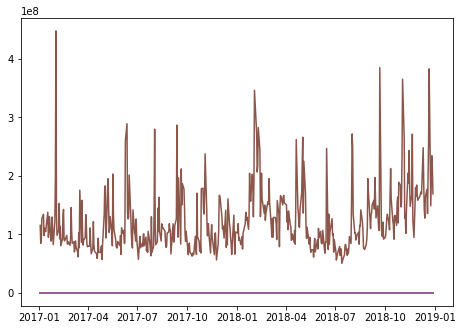

In [84]:
!pip install pandas_datareader
!conda install yfinance
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
import yfinance as yf

yf.pdr_override()
apple = pdr.get_data_yahoo("AAPL", start="2017-01-01", end="2018-12-31")
  
fig=plt.figure()
ax=fig.add_axes([0.1, 0.1, 1, 1])
ax.plot(apple)
plt.show()

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

<AxesSubplot:>

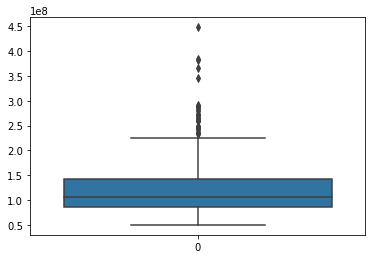

In [85]:
sns.boxplot(data=apple['Volume'])

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [86]:
data = np.load('average_ratings.npy')
data2=pd.DataFrame(data)
data2

,0,1,2,3,4,5,6,7,8,9,...,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094
0,5.0,5.013103,5.026240,5.013103,5.000000,4.986932,5.000000,5.013103,5.000000,4.986932,...,5.451021,5.436773,5.451021,5.465305,5.479627,5.493987,5.508384,5.522819,5.537292,5.522819
1,7.0,6.970750,7.000000,6.970750,6.941621,6.970750,7.000000,6.970750,7.000000,7.029373,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
2,3.0,2.996861,2.993725,2.996861,3.000000,2.996861,2.993725,2.996861,2.993725,2.996861,...,2.984338,2.981216,2.984338,2.981216,2.984338,2.987464,2.990593,2.993725,2.990593,2.987464


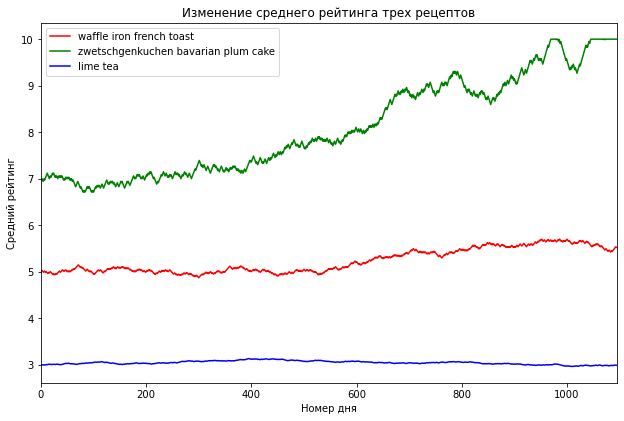

In [87]:
rating=np.mean(data, axis = 0) #значения по вертикали

fig=plt.figure(figsize=(8,5))
ax=fig.add_axes([0.1, 0.1, 1, 1]) #отступы и размеры
ax.set_xlabel('Номер дня') #подпись горизонтальной оси
ax.set_ylabel('Средний рейтинг') #подпись вертикальной оси
plt.xlim([0, data.shape[1]]) #значения по горизонтали
plt.title('Изменение среднего рейтинга трех рецептов') #заголовок

x0=data[0]
x1=data[1]
x2=data[2]

y0_line, = ax.plot(x0, 'r', label='waffle iron french toast')
y1_line, = ax.plot(x1, 'g', label='zwetschgenkuchen bavarian plum cake')
y2_line, = ax.plot(x2, 'b', label='lime tea')

ax.legend(handles=[y0_line, y1_line, y2_line]) #задаем легенду
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


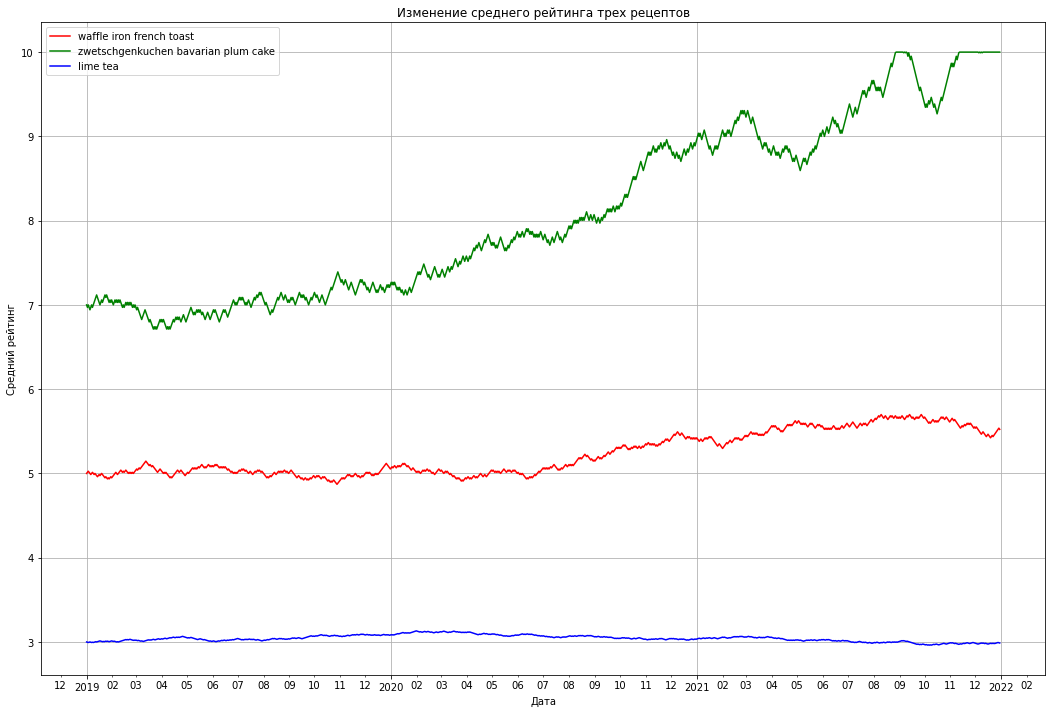

In [88]:
from datetime import date

import pylab
import matplotlib.dates
import matplotlib.ticker

plt.figure(figsize=(18,12))
dates=pd.date_range(start='2019-01-01',end='2021-12-30')

axes = pylab.subplot(1, 1, 1)

axes.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
axes.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%m'))

locator = matplotlib.dates.YearLocator()
locator2 = matplotlib.dates.MonthLocator() 

axes.xaxis.set_major_locator(locator)
axes.xaxis.set_minor_locator(locator2)

pylab.plot_date (dates, x0, fmt="r", label='waffle iron french toast')
pylab.plot_date (dates, x1, fmt="g", label='zwetschgenkuchen bavarian plum cake')
pylab.plot_date (dates, x2, fmt="b", label='lime tea')
axes.set_xlabel('Дата')
axes.set_ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')
axes.legend(handles=[y0_line, y1_line, y2_line])

pylab.grid()
pylab.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

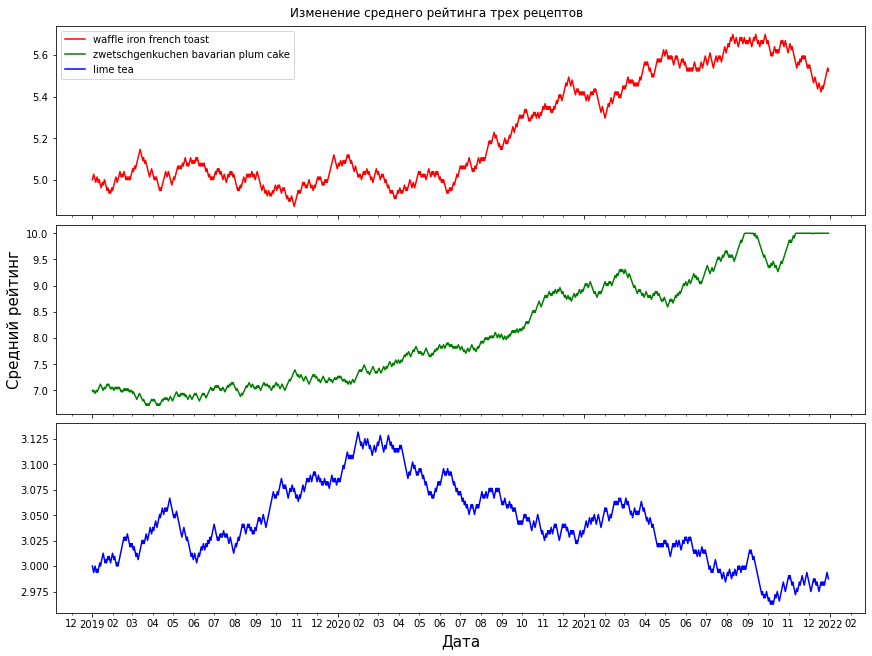

In [89]:
fig, axes = plt.subplots(figsize=(12,9), nrows=3, ncols=1, layout='constrained', sharex=True)

fig.suptitle('Изменение среднего рейтинга трех рецептов') #заголовок

axes[0].plot_date (dates, x0, fmt="r", label='waffle iron french toast')
axes[1].plot_date (dates, x1, fmt="g", label='zwetschgenkuchen bavarian plum cake')
axes[2].plot_date (dates, x2, fmt="b", label='lime tea')

axes[0].legend(handles=[y0_line, y1_line, y2_line])
axes[1].set_ylabel('Средний рейтинг', fontsize=15)
plt.xlabel('Дата', fontsize=15)

axes[2].xaxis.set_major_locator(locator)
axes[2].xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%m'))
axes[2].xaxis.set_minor_locator(locator2)

plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


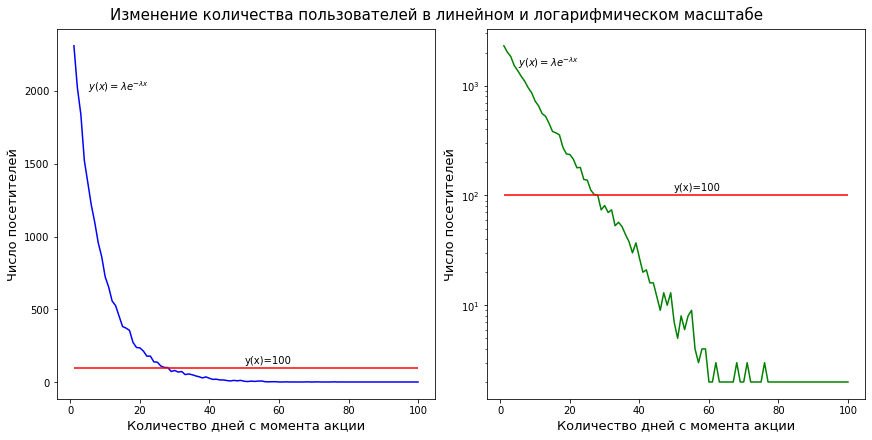

In [90]:
visitors = np.load('visitors.npy')
fig, axes = plt.subplots(figsize=(12, 6), nrows=1, ncols=2, layout='constrained')

fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе', fontsize=15)
y=visitors[:]
x=[i for i in range(1, 101)]
axes[0].plot(x, y, "b")
axes[1].plot(x, y, "g")
plt.yscale('log')  #масштабируем вертикальную ось

axes[0].hlines(100, min(x), max(x), 'r') #добавляем горизонтальные линии
axes[1].hlines(100, min(x), max(x), 'r')

axes[0].text(50, 130, "y(x)=100")  #добавляем подписи линиям
axes[1].text(50, 110, "y(x)=100")
axes[0].text(5, 2000, '$y(x)=\lambda e^{-\lambda x}$')
axes[1].text(5, 1500, '$y(x)=\lambda e^{-\lambda x}$')

axes[0].set_xlabel('Количество дней с момента акции', fontsize=13)  #добавляем подписи осей
axes[1].set_xlabel('Количество дней с момента акции', fontsize=13)
axes[0].set_ylabel('Число посетителей', fontsize=13)
axes[1].set_ylabel('Число посетителей', fontsize=13)

plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [91]:
recipes = pd.read_csv("recipes_sample.csv")
reviews = pd.read_csv('reviews_sample.csv')
reviews

,Unnamed: 0,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...,...
126691,1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
126692,158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
126693,1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
126694,453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

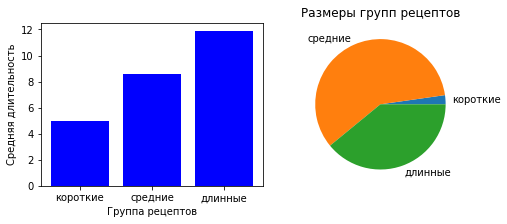

In [92]:
    #1 вариант
    #группируем рецепты по длительности
k = recipes.loc[(recipes['minutes'] < 5)]   
s = recipes.loc[(recipes['minutes'] >= 5) & (recipes['minutes'] < 50)]
d = recipes.loc[(recipes['minutes'] >= 50)]

    #считаем среднее количество шагов
steps = [k['n_steps'].mean(), s['n_steps'].mean(), d['n_steps'].mean()]

    #считаем размер каждой группы
size=[k.shape[0], s.shape[0], d.shape[0]]

index=['короткие', 'средние', 'длинные']

fig, axes = plt.subplots(figsize=(7,3), nrows=1, ncols=2, layout='constrained')
axes[0].bar(index, steps, color='b') 
axes[1].pie(size, labels=index)

axes[0].set_xlabel('Группа рецептов')
axes[0].set_ylabel('Средняя длительность')
axes[1].set_title('Размеры групп рецептов')
plt.show()

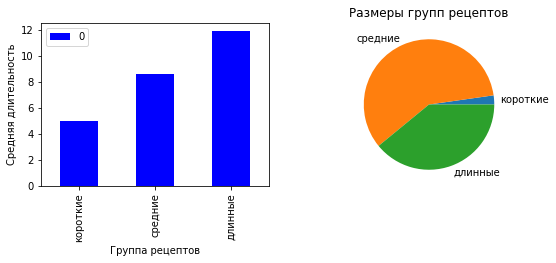

In [93]:
    #2 вариант
fig, (ax0, ax1)=plt.subplots(1, 2, figsize=(9, 3))

steps=pd.DataFrame([k['n_steps'].mean(), s['n_steps'].mean(), d['n_steps'].mean()], index)
size=pd.DataFrame([k.shape[0], s.shape[0], d.shape[0]], index)

steps.plot.bar(xlabel='Группа рецептов', ylabel='Средняя длительность', ax=ax0, color='b')
size.plot.pie(subplots=True, title=['Размеры групп рецептов'], ylabel='', ax=ax1, legend=False)

plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

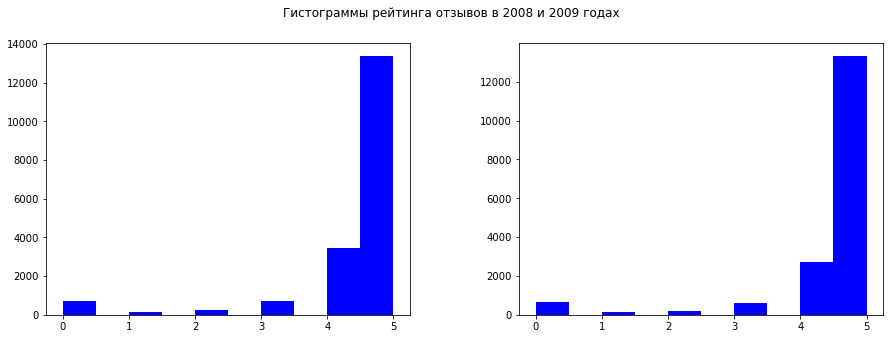

In [94]:
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(15,5))
reviews['date'] = reviews['date'].astype("datetime64[ns]")
reviews[reviews['date'].dt.year==2008]['rating'].plot.hist(ax=ax1, color='b')
reviews[reviews['date'].dt.year==2009]['rating'].plot.hist(ax=ax2, color='b')

ax1.set_ylabel('')
ax2.set_ylabel('')

fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')
plt.subplots_adjust(wspace=0.3)
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

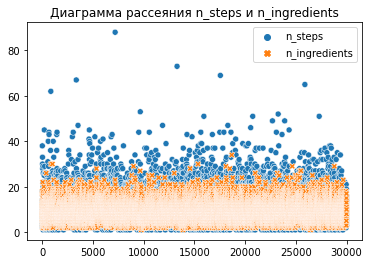

In [95]:
sns.scatterplot(data=[recipes['n_steps'], recipes['n_ingredients']]).set_title("Диаграмма рассеяния n_steps и n_ingredients")
plt.show()

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

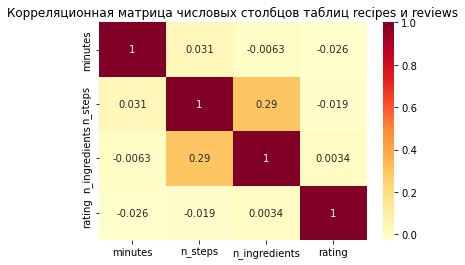

In [96]:
table=pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')[['minutes', 'n_steps', 'n_ingredients', 'rating']]
corr=table.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values, cmap='YlOrRd', annot=True).set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
plt.show()